# Link to the dataset on Kaggle
https://www.kaggle.com/datasets/ahsenwaheed/youtube-comments-spam-dataset

# Load the Data

In [47]:
import pandas as pd
data=pd.read_csv("Youtube-Spam-Dataset.csv")

In [48]:
data

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1
...,...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0


# Understanding data

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [50]:
data.describe()

,CLASS
count,1956.000000
mean,0.513804
std,0.499937
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# check nulls

In [51]:
data.isna().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64

In [52]:
data.dropna(inplace=True)

In [53]:
data.isna().sum()

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
VIDEO_NAME    0
CLASS         0
dtype: int64

# check duplicated

In [54]:
data.duplicated().sum()

1

In [55]:
dubli=data[data.duplicated()]
dubli

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
1798,_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0,tyler sleetway,2013-10-05T00:57:25.078000,so beutiful,Shakira - Waka Waka,0


In [56]:
data=data.drop(index=1798)

# Data Analysis

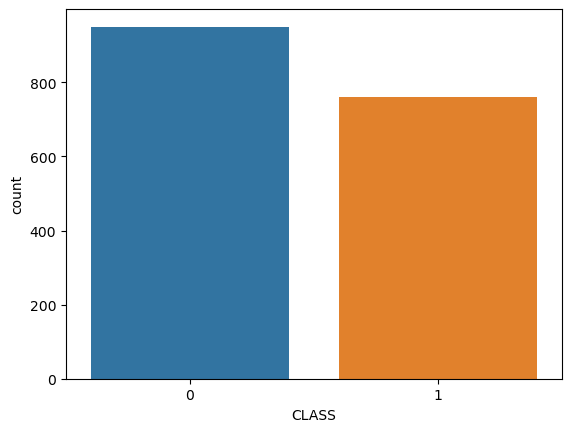

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='CLASS',data=data)
plt.show()


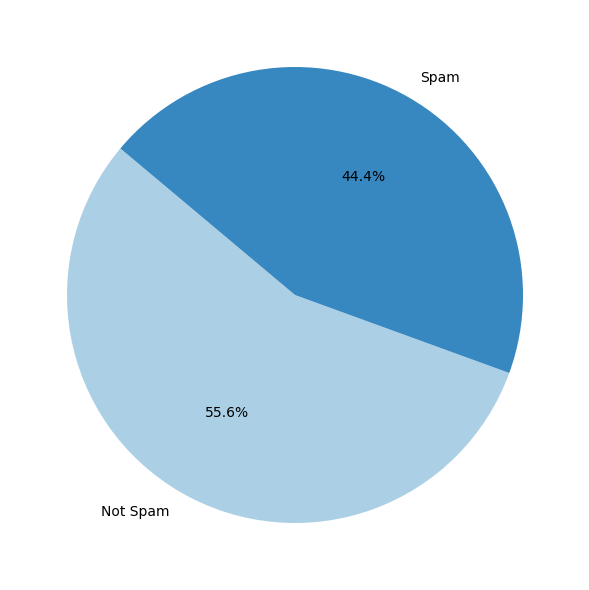

In [59]:
spam_counts = data['CLASS'].value_counts().sort_index()

palette = sns.color_palette("Blues", n_colors=len(spam_counts))
fig = plt.figure(figsize=(10, 6))
plt.pie(spam_counts, autopct='%1.1f%%', startangle=140, colors=palette, labels=["Not Spam", "Spam"])
plt.tight_layout()
plt.show()

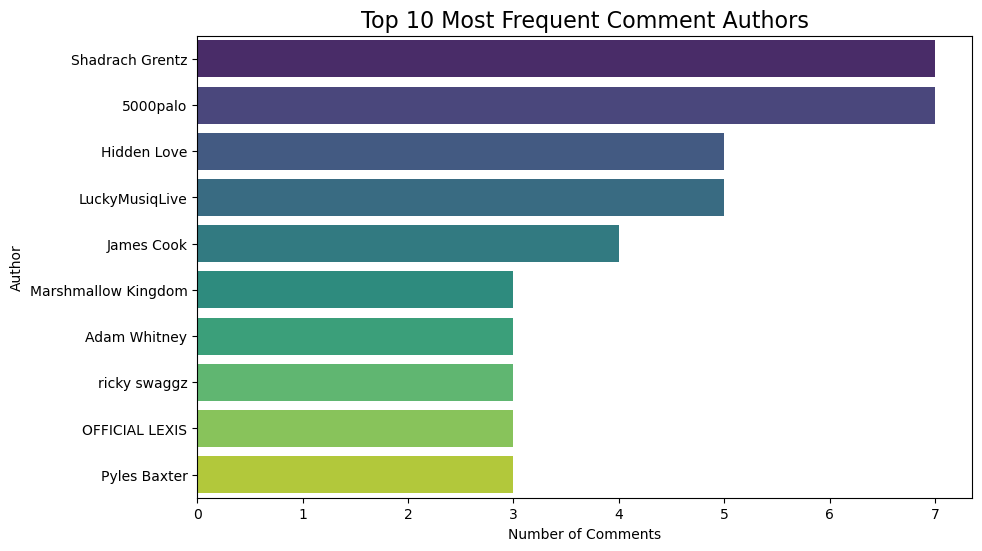

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['AUTHOR'].value_counts().head(10).values, 
            y=data['AUTHOR'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Most Frequent Comment Authors', fontsize=16)
plt.xlabel('Number of Comments')
plt.ylabel('Author')
plt.show()

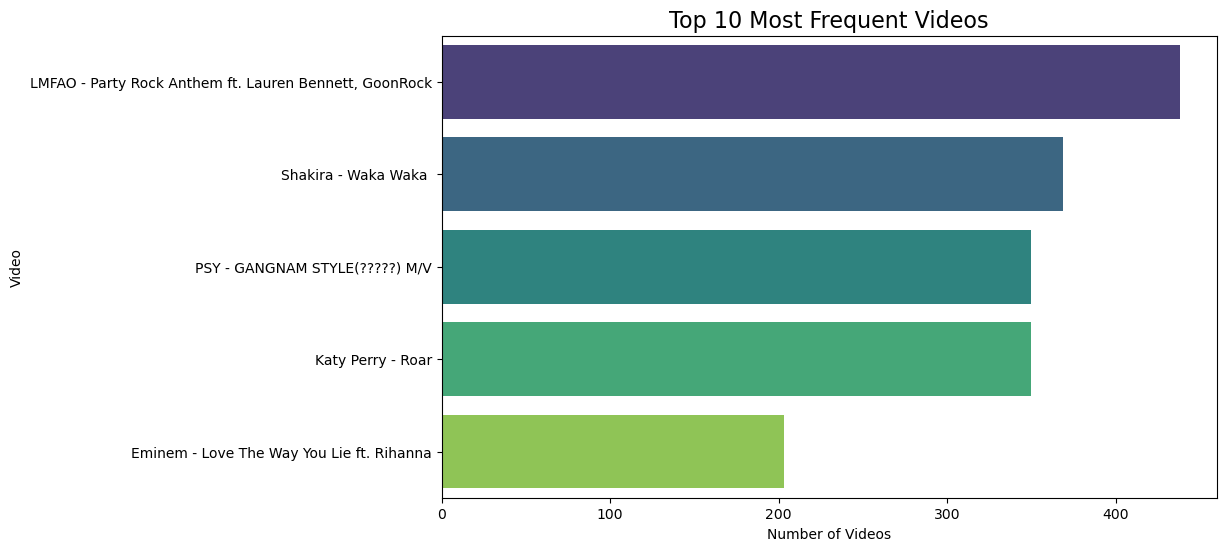

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['VIDEO_NAME'].value_counts().head(5).values, 
            y=data['VIDEO_NAME'].value_counts().head(5).index, palette='viridis')
plt.title('Top 10 Most Frequent Videos', fontsize=16)
plt.xlabel('Number of Videos')
plt.ylabel('Video')
plt.show()

# feature extraction

In [68]:
data["year"]=data["DATE"].str.split("T").str[0].str.split("-").str[0]

In [69]:
data

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,year
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,2013
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,2013
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,2013
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,2013
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,2013
...,...,...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0,2013
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0,2013
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0,2013
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0,2013


In [70]:
data["month"]=data["DATE"].str.split("T").str[0].str.split("-").str[1]
data["day"]=data["DATE"].str.split("T").str[0].str.split("-").str[2]
data["hour"]=data["DATE"].str.split("T").str[1].str.split(":").str[0]
data["minute"]=data["DATE"].str.split("T").str[1].str.split(":").str[1]
data["second"]=data["DATE"].str.split("T").str[1].str.split(":").str[2]

In [71]:
data

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,year,month,day,hour,minute,second
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,2013,11,07,06,20,48
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,07,12,37,15
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,08,17,34,21
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,09,08,28,43
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,10,16,05,38
...,...,...,...,...,...,...,...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0,2013,07,13,13,27,39.441000
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0,2013,07,13,13,14,30.021000
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0,2013,07,13,12,09,31.188000
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0,2013,07,13,11,17,52.308000


In [72]:
data["dayname"] = pd.to_datetime(data["DATE"].str.split("T").str[0]).dt.strftime('%A')

In [73]:
data

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,year,month,day,hour,minute,second,dayname
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,2013,11,07,06,20,48,Thursday
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,07,12,37,15,Thursday
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,08,17,34,21,Friday
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,09,08,28,43,Saturday
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,10,16,05,38,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0,2013,07,13,13,27,39.441000,Saturday
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0,2013,07,13,13,14,30.021000,Saturday
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0,2013,07,13,12,09,31.188000,Saturday
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0,2013,07,13,11,17,52.308000,Saturday


# Check balance in VIDEO_NAME

In [74]:
data["VIDEO_NAME"].value_counts()

LMFAO - Party Rock Anthem ft. Lauren Bennett, GoonRock    438
Shakira - Waka Waka                                       369
PSY - GANGNAM STYLE(?????) M/V                            350
Katy Perry - Roar                                         350
Eminem - Love The Way You Lie ft. Rihanna                 203
Name: VIDEO_NAME, dtype: int64

In [75]:
#balanced

# Feature selection 1

In [76]:
data.drop("COMMENT_ID",inplace=True,axis=1)

In [77]:
author=data["AUTHOR"].unique()
numberofouther=len(author)
print(numberofouther)

1615


In [78]:
data.drop("AUTHOR",inplace=True,axis=1)

In [79]:
data

,DATE,CONTENT,VIDEO_NAME,CLASS,year,month,day,hour,minute,second,dayname
0,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,2013,11,07,06,20,48,Thursday
1,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,07,12,37,15,Thursday
2,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,08,17,34,21,Friday
3,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,09,08,28,43,Saturday
4,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,10,16,05,38,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
1951,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0,2013,07,13,13,27,39.441000,Saturday
1952,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0,2013,07,13,13,14,30.021000,Saturday
1953,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0,2013,07,13,12,09,31.188000,Saturday
1954,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0,2013,07,13,11,17,52.308000,Saturday


In [80]:
data.drop("DATE",inplace=True,axis=1)

In [81]:
data

,CONTENT,VIDEO_NAME,CLASS,year,month,day,hour,minute,second,dayname
0,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,2013,11,07,06,20,48,Thursday
1,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,07,12,37,15,Thursday
2,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,08,17,34,21,Friday
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,09,08,28,43,Saturday
4,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,2013,11,10,16,05,38,Sunday
...,...,...,...,...,...,...,...,...,...,...
1951,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0,2013,07,13,13,27,39.441000,Saturday
1952,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0,2013,07,13,13,14,30.021000,Saturday
1953,wow,Shakira - Waka Waka,0,2013,07,13,12,09,31.188000,Saturday
1954,Shakira u are so wiredo,Shakira - Waka Waka,0,2013,07,13,11,17,52.308000,Saturday


# Split data to(X,Y)

In [82]:
X=data.drop(["CLASS","CONTENT"],inplace=False,axis=1)
X

,VIDEO_NAME,year,month,day,hour,minute,second,dayname
0,PSY - GANGNAM STYLE(?????) M/V,2013,11,07,06,20,48,Thursday
1,PSY - GANGNAM STYLE(?????) M/V,2013,11,07,12,37,15,Thursday
2,PSY - GANGNAM STYLE(?????) M/V,2013,11,08,17,34,21,Friday
3,PSY - GANGNAM STYLE(?????) M/V,2013,11,09,08,28,43,Saturday
4,PSY - GANGNAM STYLE(?????) M/V,2013,11,10,16,05,38,Sunday
...,...,...,...,...,...,...,...,...
1951,Shakira - Waka Waka,2013,07,13,13,27,39.441000,Saturday
1952,Shakira - Waka Waka,2013,07,13,13,14,30.021000,Saturday
1953,Shakira - Waka Waka,2013,07,13,12,09,31.188000,Saturday
1954,Shakira - Waka Waka,2013,07,13,11,17,52.308000,Saturday


In [83]:
y=data["CLASS"]

# Encoding (Tfidf)

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

In [85]:
tfidf= TfidfVectorizer(stop_words='english', max_features=1000)
x_tfidf = tfidf.fit_transform(data['CONTENT'])
x_tfidf = pd.DataFrame(x_tfidf.toarray(), columns=tfidf.get_feature_names_out())
categorical = ['dayname', 'VIDEO_NAME']
one_hot = OneHotEncoder()
transeformer = ColumnTransformer([("one_hot", one_hot, categorical)], remainder="passthrough")
transeformer_x = transeformer.fit_transform(X)
transeformer_x_df = pd.DataFrame(transeformer_x, columns=transeformer.get_feature_names_out())
combined_df = pd.concat([x_tfidf,transeformer_x_df], axis=1)
combined_df

,00,000,08,10,100,10001,104999962146104962510,13,14,1415297812,...,one_hot__VIDEO_NAME_Katy Perry - Roar,"one_hot__VIDEO_NAME_LMFAO - Party Rock Anthem ft. Lauren Bennett, GoonRock",one_hot__VIDEO_NAME_PSY - GANGNAM STYLE(?????) M/V,one_hot__VIDEO_NAME_Shakira - Waka Waka,remainder__year,remainder__month,remainder__day,remainder__hour,remainder__minute,remainder__second
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2013,11,07,06,20,48
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2013,11,07,12,37,15
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2013,11,08,17,34,21
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2013,11,09,08,28,43
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2013,11,10,16,05,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2013,07,13,13,27,39.441000
1706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2013,07,13,13,14,30.021000
1707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2013,07,13,12,09,31.188000
1708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2013,07,13,11,17,52.308000


# Train test split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(combined_df, y, test_size=0.20, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1368, 1018)
X_test shape is  (342, 1018)
y_train shape is  (1368,)
y_test shape is  (342,)


In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],          
    'max_depth': [2, 4, 6, None],       
    'criterion': ['gini', 'entropy'],  
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4] ,}           
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Transactions:", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Transactions: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(n_estimators=200, random_state=42)

In [90]:
from sklearn.metrics import classification_report

In [91]:
y_pred=best_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [92]:
list(y_test)

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,


In [93]:
ClassificationReport = classification_report(y_test,y_pred)

In [94]:
rint('Claspsification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       194
           1       0.96      0.91      0.93       148

    accuracy                           0.94       342
   macro avg       0.95      0.94      0.94       342
weighted avg       0.94      0.94      0.94       342



In [95]:

from sklearn.ensemble import GradientBoostingClassifier

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=33)
param_grid = {
    'n_estimators': [50, 100, 200],           
    'learning_rate': [0.01, 0.1, 0.05],      
    'max_depth': [3, 4, 5],                   
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4]             
}
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Transactions:", grid_search.best_params_)
best_model = grid_search.best_estimator_ 
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Transactions: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, n_estimators=200,
                           random_state=33)

In [97]:
y_pred=best_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [98]:
ClassificationReport = classification_report(y_test,y_pred)

In [99]:
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       194
           1       0.96      0.90      0.93       148

    accuracy                           0.94       342
   macro avg       0.95      0.94      0.94       342
weighted avg       0.94      0.94      0.94       342



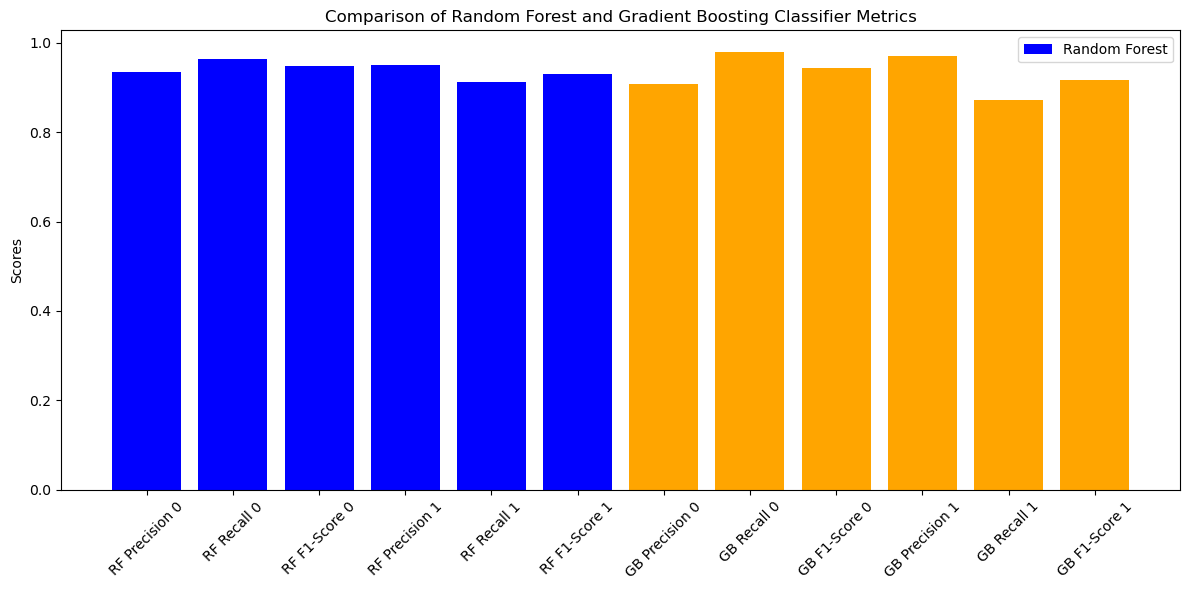

In [101]:

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
report_rfc = classification_report(y_test, y_pred_rfc, output_dict=True)

gbc = GradientBoostingClassifier(random_state=33)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
report_gbc = classification_report(y_test, y_pred_gbc, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']
rfc_metrics = [report_rfc['0'][metric] for metric in metrics] + [report_rfc['1'][metric] for metric in metrics]
gbc_metrics = [report_gbc['0'][metric] for metric in metrics] + [report_gbc['1'][metric] for metric in metrics]

labels = ['RF Precision 0', 'RF Recall 0', 'RF F1-Score 0', 'RF Precision 1', 'RF Recall 1', 'RF F1-Score 1',
          'GB Precision 0', 'GB Recall 0', 'GB F1-Score 0', 'GB Precision 1', 'GB Recall 1', 'GB F1-Score 1']


x = range(len(labels))
plt.figure(figsize=(12, 6))
plt.bar(x, rfc_metrics + gbc_metrics, color=['blue'] * 6 + ['orange'] * 6)


plt.title('Comparison of Random Forest and Gradient Boosting Classifier Metrics')
plt.xticks(x, labels, rotation=45)
plt.ylabel('Scores')
plt.legend(['Random Forest', 'Gradient Boosting'], loc='upper right')
plt.tight_layout()


plt.show()
